In [82]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_bphebb import SimpleNeuralNetwork
from tqdm.notebook import tqdm

In [83]:
# load the pickle file
with open('perturbation_exp_result.pkl', 'rb') as f:
    all_perturb_lasts = pickle.load(f)
    all_simu_losses = pickle.load(f)
    all_gain_changes = pickle.load(f)
    all_shift_changes = pickle.load(f)
    all_weight_sums = pickle.load(f)

simu_epochs = 3000
perturb_lasts = np.unique(all_perturb_lasts)
nperturb = len(perturb_lasts)

In [84]:
simu_losses_3d = np.array(all_simu_losses).reshape(-1, nperturb, simu_epochs)
simu_losses_means = np.mean(simu_losses_3d, axis=0)

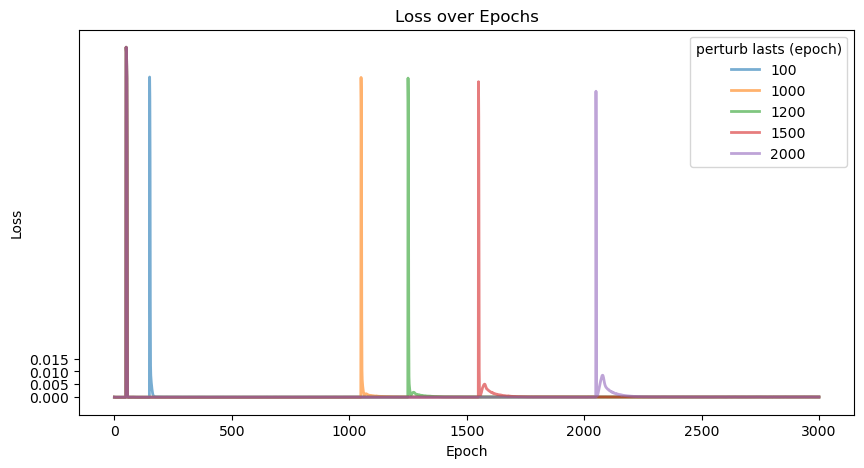

In [97]:
# Plotting the loss
fig, ax = plt.subplots(figsize=(10, 5))
for i, simu_losses in enumerate(simu_losses_means):
    # if i <= 3 or i % 3 != 2:
    #     continue
    plt.plot(range(simu_epochs), simu_losses, label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 0.02, 0.005))
plt.ylabel('Loss')
# plt.ylim([0,0.02])
plt.title('Loss over Epochs')
plt.legend(title='perturb lasts (epoch)')
# plt.savefig('fig/0214_abb05_perturb_loss_train.png')
plt.show()

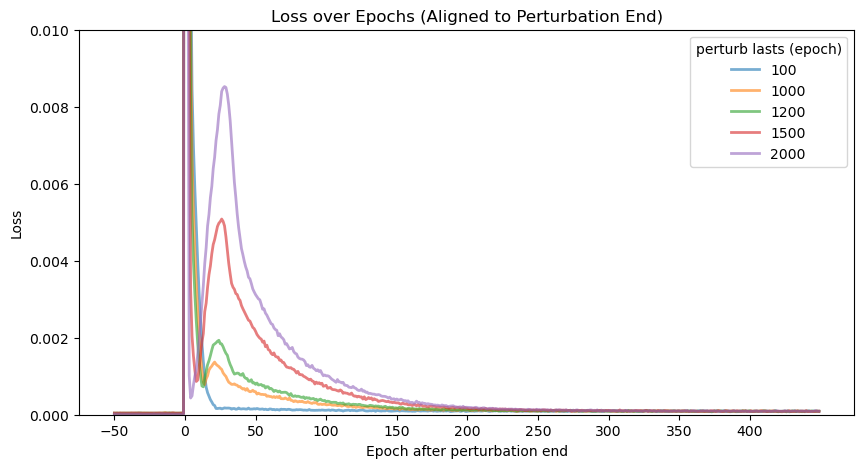

In [86]:
# Plotting the loss
fig, ax = plt.subplots(figsize=(10, 5))
for i, simu_losses in enumerate(simu_losses_means):
    # if i <= 3 or i % 3 != 2:
    #     continue
    plt.plot(range(-50, 450), simu_losses[perturb_lasts[i]:500+perturb_lasts[i]], label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xticks(np.arange(-50, 450, 50))
plt.xlabel('Epoch after perturbation end')
plt.ylabel('Loss')
plt.ylim([0,0.01])
# plt.xlim([0,200])
plt.title('Loss over Epochs (Aligned to Perturbation End)')
plt.legend(title='perturb lasts (epoch)')
# plt.savefig('fig/0214_abb05_perturb_loss_align.png')
plt.show()

In [87]:
gain_changes_3d = np.array(all_gain_changes).reshape(-1, nperturb, simu_epochs)
gain_changes_means = np.mean(gain_changes_3d, axis=0)

Text(0.5, 1.0, 'Gain Change over Epochs')

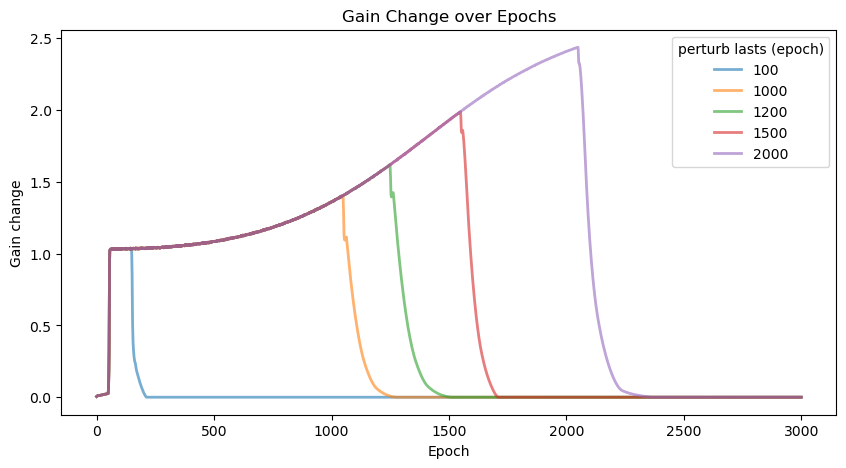

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, gain_changes in enumerate(gain_changes_means):
    # if i <= 3 or i % 3 != 2:
    #     continue
    plt.plot(np.arange(simu_epochs), gain_changes, label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xlabel("Epoch")
plt.ylabel("Gain change")
plt.legend(title='perturb lasts (epoch)')
plt.title('Gain Change over Epochs')
# plt.savefig('fig/0214_abb05_perturb_gc.png')

In [89]:
shift_changes_3d = np.array(all_shift_changes).reshape(-1, nperturb, simu_epochs)
shift_changes_means = np.mean(shift_changes_3d, axis=0)

Text(0.5, 1.0, 'Shift Change over Epochs')

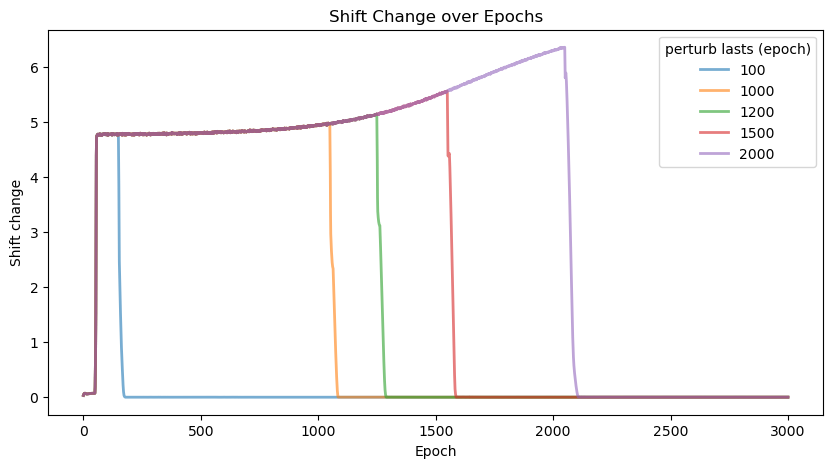

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, shift_changes in enumerate(shift_changes_means):
    # if i <= 3 or i % 3 != 2:
    #     continue
    plt.plot(np.arange(simu_epochs), shift_changes, label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xlabel("Epoch")
plt.ylabel("Shift change")
plt.legend(title='perturb lasts (epoch)')
plt.title('Shift Change over Epochs')
# plt.savefig('fig/0214_abb05_perturb_sc.png')

In [91]:
recover_costs = []
recover_epochs = []
for k in range(len(all_simu_losses)):
    simu_losses = all_simu_losses[k]
    perturb_last = all_perturb_lasts[k]
    perturb_start = 50
    origin_start = perturb_start + perturb_last

    recover_cost = 0
    recover_epoch = 0
    for i, loss in enumerate(simu_losses):
        if i > origin_start:
            if loss < 0.0001:
                break
            if loss < 1:
                recover_cost += loss
                recover_epoch += 1

    # print(recover_cost)
    # print(recover_epoch)
    recover_costs.append(recover_cost)
    recover_epochs.append(recover_epoch)

In [92]:
recover_costs_2d = np.array(recover_costs).reshape(-1, nperturb)
recover_costs_mean = np.mean(recover_costs_2d, axis=0)
recover_costs_std = np.std(recover_costs_2d, axis=0)

In [93]:
recover_costs_std

array([0., 0., 0., 0., 0.])

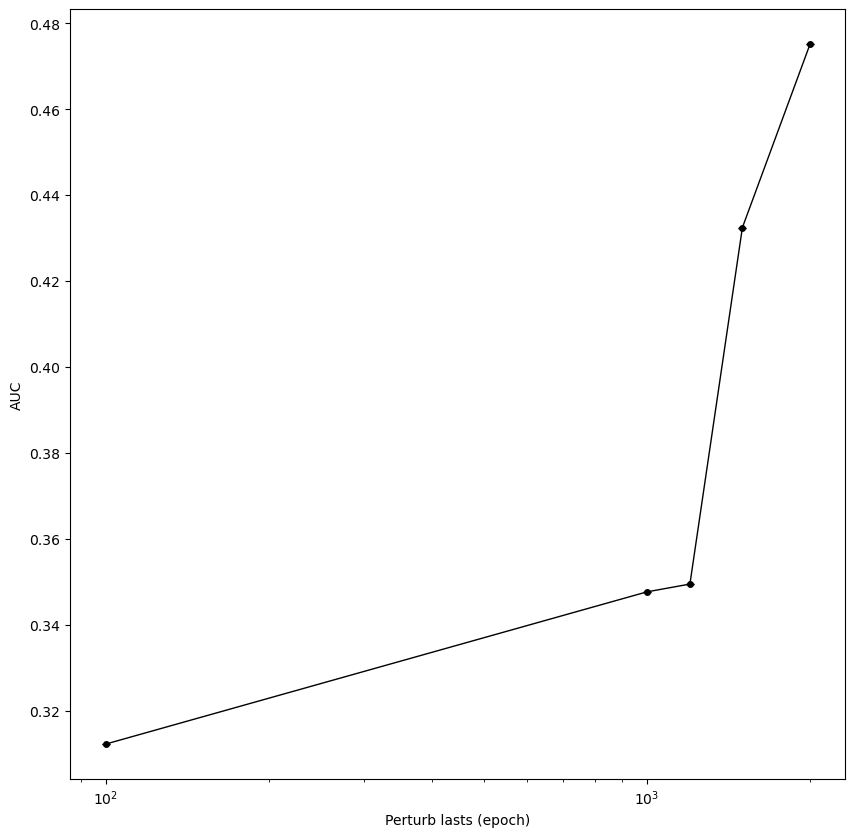

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(perturb_lasts, recover_costs_mean, yerr=recover_costs_std, capsize=3, marker='.', lw=1, markersize=8, color='k')
plt.ylabel('AUC')
plt.xlabel('Perturb lasts (epoch)')
plt.xscale('log')
# plt.savefig('fig/0214_abb05_perturb_auc.png')

In [95]:
recover_epochs_2d = np.array(recover_epochs).reshape(-1, nperturb)
recover_epochs_mean = np.mean(recover_epochs_2d, axis=0)
recover_epochs_std = np.std(recover_epochs_2d, axis=0)

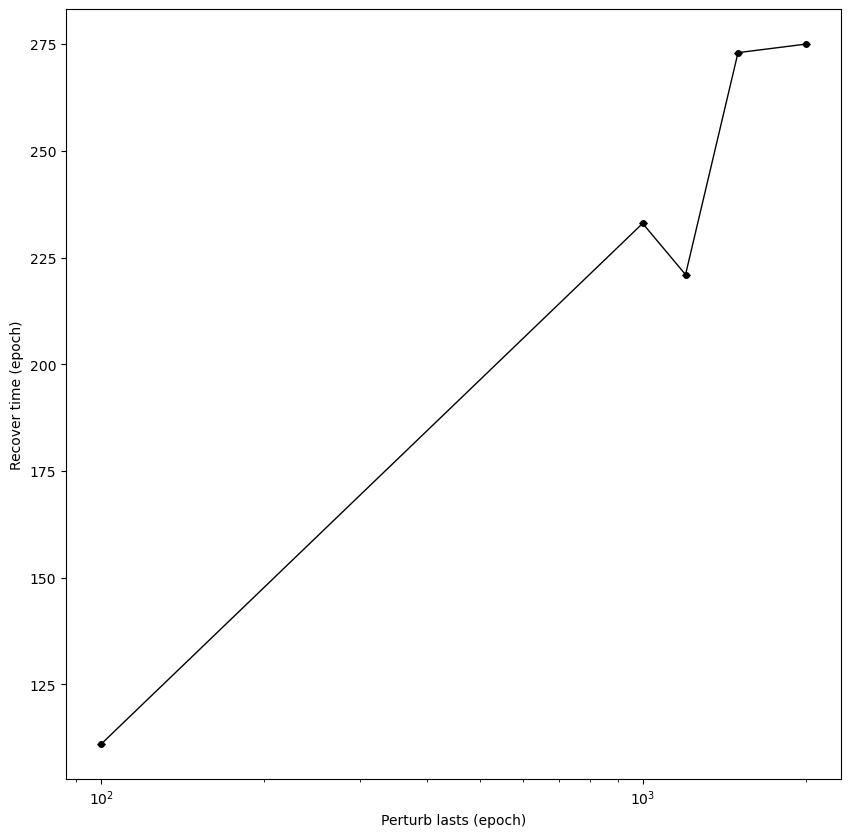

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(perturb_lasts, recover_epochs_mean, yerr=recover_epochs_std, capsize=3, lw=1, marker='.', markersize=8, color='k')
plt.ylabel('Recover time (epoch)')
plt.xlabel('Perturb lasts (epoch)')
plt.xscale('log')
# plt.savefig('fig/0214_abb05_perturb_rectime.png')